<a href="https://colab.research.google.com/github/ArshockAbedan/ML2021/blob/main/Keras_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.datasets as datasets
import tensorflow.keras.layers as layers
import numpy as np

In [ ]:
# Load the IMDB mvie review dataset
data = datasets.imdb.load_data()

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
# Similar to MNIST dataset, it split between training and testing data 
(x_train, y_train), (x_test, y_test) = data

In [ ]:
# Load the worw_index table
index = datasets.imdb.get_word_index()

In [ ]:
# build the lookup table
id_to_word = dict((i+3, w) for (w, i) in index.items())
id_to_word.update({
    0: '<PAD>',
    1: '<START>',
    2: '<UNKOWN>',
    3: '<UNUSED>',
})

In [ ]:
np.array(x_train[0][:10])

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65])

In [ ]:
# decode the above sequence
" ".join(id_to_word[i] for i in x_train[0][:10])

'<START> this film was just brilliant casting location scenery story'

In [ ]:
def decode(ordinals):
  return " ".join(id_to_word[i] for i in ordinals)

In [ ]:
decode(x_train[2]), y_train[2]

("<START> this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had earnt working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how embarrasing this is to watch save yourself an hour a bit of your life",
 0)

In [ ]:
# The vocabulary size is
len(index)

88584

**A Reduced Dataset**

In [ ]:
data = datasets.imdb.load_data(
    num_words = 1000,
    skip_top = 5
)

(x_train, y_train), (x_test, y_test) = data

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
decode(x_train[0])

"<UNKOWN> this film was just brilliant casting <UNKOWN> <UNKOWN> story direction <UNKOWN> really <UNKOWN> <UNKOWN> part they played and you could just imagine being there robert <UNKOWN> is an amazing actor and now <UNKOWN> same being director <UNKOWN> father came from <UNKOWN> same <UNKOWN> <UNKOWN> as myself so i loved <UNKOWN> fact there was a real <UNKOWN> with this film <UNKOWN> <UNKOWN> <UNKOWN> throughout <UNKOWN> film were great it was just brilliant so much that i <UNKOWN> <UNKOWN> film as soon as it was released for <UNKOWN> and would recommend it to everyone to watch and <UNKOWN> <UNKOWN> <UNKOWN> was amazing really <UNKOWN> at <UNKOWN> end it was so sad and you know what they say if you <UNKOWN> at a film it must have been good and this definitely was also <UNKOWN> to <UNKOWN> two little <UNKOWN> that played <UNKOWN> <UNKOWN> of <UNKOWN> and paul they were just brilliant children are often left out of <UNKOWN> <UNKOWN> <UNKOWN> i think because <UNKOWN> stars that play them 

In [ ]:
decode(x_train[1])

"<UNKOWN> big <UNKOWN> big <UNKOWN> bad music and a <UNKOWN> <UNKOWN> <UNKOWN> these are <UNKOWN> words to best <UNKOWN> this terrible movie i love cheesy horror movies and i've seen <UNKOWN> but this had got to be on of <UNKOWN> worst ever made <UNKOWN> plot is <UNKOWN> <UNKOWN> and ridiculous <UNKOWN> acting is an <UNKOWN> <UNKOWN> script is completely <UNKOWN> <UNKOWN> best is <UNKOWN> end <UNKOWN> with <UNKOWN> <UNKOWN> and how he worked out who <UNKOWN> killer is it's just so <UNKOWN> <UNKOWN> written <UNKOWN> <UNKOWN> are <UNKOWN> and funny in <UNKOWN> <UNKOWN> <UNKOWN> <UNKOWN> is big lots of <UNKOWN> <UNKOWN> men <UNKOWN> those cut <UNKOWN> <UNKOWN> that show off their <UNKOWN> <UNKOWN> that men actually <UNKOWN> them and <UNKOWN> music is just <UNKOWN> <UNKOWN> that plays over and over again in almost every scene there is <UNKOWN> music <UNKOWN> and <UNKOWN> taking away <UNKOWN> and <UNKOWN> <UNKOWN> still doesn't close for <UNKOWN> all <UNKOWN> <UNKOWN> this is a truly bad fi

In [ ]:
# encode text to ordinals (at the application level), I compute the reserve lookup table
word_to_id = {
    w:i for (i,w) in id_to_word.items()
}

In [ ]:
def encode(text):
  return [word_to_id.get(w, 2) for w in text.split()]

In [ ]:
encode("this film was just brilliant casting")

[14, 22, 16, 43, 530, 973]

**End-to-end Text Classification with RNN**

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.datasets as datasets
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow.keras.preprocessing.sequence as sequence
import numpy as np

In [49]:
data = datasets.imdb.load_data(num_words=10000, skip_top=10)
word_index = datasets.imdb.get_word_index()

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [50]:
(x_train, y_train), (x_test, y_test) = data

In [51]:
i2w = dict((i+3,w) for (w,i) in word_index.items())
i2w.update({
    0: '<PAD>',
    1: '<START>',
    2: '<OOV>',
    3: '<?>',
})

In [52]:
# The ordinal2text function decodes the ordinal numbers to text
def ordinal2text(seq):
  return " ".join([i2w[i] for i in seq])

In [53]:
ordinal2text(x_train[0])

"<OOV> this film was just brilliant casting location scenery story direction everyone's really suited <OOV> part they played <OOV> you could just imagine being there robert <OOV> <OOV> an amazing actor <OOV> now <OOV> same being director <OOV> father came from <OOV> same scottish island as myself so i loved <OOV> fact there was <OOV> real connection with this film <OOV> witty remarks throughout <OOV> film were great it was just brilliant so much that i bought <OOV> film as soon as it was released for <OOV> <OOV> would recommend it <OOV> everyone <OOV> watch <OOV> <OOV> fly fishing was amazing really cried at <OOV> end it was so sad <OOV> you know what they say if you cry at <OOV> film it must have been good <OOV> this definitely was also <OOV> <OOV> <OOV> two little boy's that played <OOV> <OOV> <OOV> norman <OOV> paul they were just brilliant children are often left out <OOV> <OOV> <OOV> list i think because <OOV> stars that play them all grown up are such <OOV> big profile for <OOV> 

In [54]:
# The embedding layer maps ordinal indices to embedding vectors.
# Input shape is:  (batch_size, sequence_length)
# Output shape is: (batch_size, sequence_length, dimension)
embedding = layers.Embedding(10000, 20)

In [55]:
input_seq = np.array([[1,2,3, 3, 2], [1,2, 0, 0, 0]])

embedding_vectors = embedding(input_seq)

print(input_seq.shape,"==>", embedding_vectors.shape)

(2, 5) ==> (2, 5, 20)


In [56]:
# The SimpleRNN layer uses state vectors - embedding_vectors - to perform reduction on the sequence of input vectors.
rnn = layers.SimpleRNN(7)

In [57]:
output_vector = rnn(embedding_vectors)

print(embedding_vectors.shape, "==>", output_vector.shape)

(2, 5, 20) ==> (2, 7)


In [58]:
# We can use a dense layer to conver the RNN output to a probability of good movie review
dense = layers.Dense(1, activation='sigmoid')

In [59]:
output = dense(output_vector)

print(output_vector.shape, "==>", output.shape)

(2, 7) ==> (2, 1)


**Padding and truncation**

We need all the input sequences to have the same length for embedding layer to work.

In [60]:
batch = x_train[:5]

[len(x) for x in batch]

[218, 189, 141, 550, 147]

This requires us to padd all the sequences that are too short, and truncate sequences that are too long

In [61]:
padded_batch = sequence.pad_sequences(batch, maxlen=200)

[len(x) for x in padded_batch]

[200, 200, 200, 200, 200]

In [62]:
padded_batch

array([[   2,   25,  100,   43,  838,  112,   50,  670,    2,    2,   35,
         480,  284,    2,  150,    2,  172,  112,  167,    2,  336,  385,
          39,    2,  172, 4536, 1111,   17,  546,   38,   13,  447,    2,
         192,   50,   16,    2,  147, 2025,   19,   14,   22,    2, 1920,
        4613,  469,    2,   22,   71,   87,   12,   16,   43,  530,   38,
          76,   15,   13, 1247,    2,   22,   17,  515,   17,   12,   16,
         626,   18,    2,    2,   62,  386,   12,    2,  316,    2,  106,
           2,    2, 2223, 5244,   16,  480,   66, 3785,   33,    2,  130,
          12,   16,   38,  619,    2,   25,  124,   51,   36,  135,   48,
          25, 1415,   33,    2,   22,   12,  215,   28,   77,   52,    2,
          14,  407,   16,   82,    2,    2,    2,  107,  117, 5952,   15,
         256,    2,    2,    2, 3766,    2,  723,   36,   71,   43,  530,
         476,   26,  400,  317,   46,    2,    2,    2, 1029,   13,  104,
          88,    2,  381,   15,  297, 

**Building an end-to-end network**

In [63]:
maxlen = 200
inputs = layers.Input(shape=(maxlen))
x = embedding(inputs)
x = rnn(x)
sentiment_output = dense(x)

In [64]:
model = models.Model(inputs=inputs, outputs = sentiment_output)

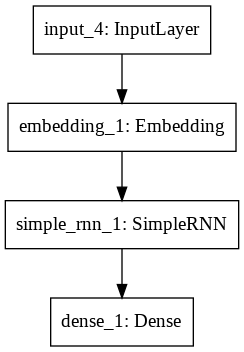

In [65]:
keras.utils.plot_model(model)

In [66]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [67]:
x_train_padded = sequence.pad_sequences(x_train, maxlen=maxlen)

In [68]:
model.fit(x_train_padded, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 20s 31ms/step - loss: 0.6720 - acc: 0.5586 - val_loss: 0.5101 - val_acc: 0.7584
Epoch 2/5
625/625 [==============================] - 19s 30ms/step - loss: 0.4006 - acc: 0.8250 - val_loss: 0.3985 - val_acc: 0.8312
Epoch 3/5
625/625 [==============================] - 19s 30ms/step - loss: 0.2752 - acc: 0.8959 - val_loss: 0.3993 - val_acc: 0.8236
Epoch 4/5
625/625 [==============================] - 19s 30ms/step - loss: 0.2144 - acc: 0.9233 - val_loss: 0.4183 - val_acc: 0.8266
Epoch 5/5
625/625 [==============================] - 19s 30ms/step - loss: 0.1696 - acc: 0.9442 - val_loss: 0.4494 - val_acc: 0.8332


We can make use of the model to do some text analysis.

In [69]:
w2i = {w:i for (i,w) in i2w.items()}

def text2ordinal(text):
    return [w2i.get(w, 2) for w in text.split()]

In [70]:
text_ordinals = text2ordinal("This film was just brilliant")
model.predict(sequence.pad_sequences([text_ordinals], maxlen=maxlen))

array([[0.9714042]], dtype=float32)

In [71]:
text_ordinals = text2ordinal("rendered terrible flat flat flat performances")
model.predict(sequence.pad_sequences([text_ordinals], maxlen=maxlen))

array([[0.28292137]], dtype=float32)